# Quasi-Random Sequence Generator Comparison

In [1]:
from qmcpy import *

import pandas as pd
pd.options.display.float_format = '{:.2e}'.format

from numpy import *
set_printoptions(threshold=2**10)
set_printoptions(precision=3)

from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


## General Usage

In [2]:
# Unshifted Samples
lattice = Lattice(dimension=2, randomize=False, seed=7, backend='MPS')
unshifted_samples = lattice.gen_samples(n_min=2,n_max=8)
print('Shape: %s'%str(unshifted_samples.shape))
print('Samples:\n'+str(unshifted_samples))

Shape: (6, 2)
Samples:
[[0.25  0.75 ]
 [0.75  0.25 ]
 [0.125 0.375]
 [0.375 0.125]
 [0.625 0.875]
 [0.875 0.625]]


In [3]:
# Shifted Samples
lattice = Lattice(dimension=2, randomize=True, seed=7, backend='GAIL')
shifted_samples = lattice.gen_samples(n_min=4, n_max=8)
print('Shape: %s'%str(shifted_samples.shape))
print('Samples:\n'+str(shifted_samples))

Shape: (4, 2)
Samples:
[[0.201 0.155]
 [0.701 0.655]
 [0.451 0.905]
 [0.951 0.405]]


## QMCPy Generator Times Comparison
Compare the speed of low-discrepancy-sequence generators from Python (QMCPy), MATLAB, and R.<br>
The following blocks visualize speed comparisons when generating 1 dimensional unshifted/unscrambled sequences. Note that the generators are reinitialized before every trial.

In [4]:
# Load AccumulateData
df_py = pd.read_csv('../workouts/lds_sequences/out/python_sequences.csv')
df_py.columns = ['n',
                 'py_l_MPS','py_l_GAIL',
                 'py_s_QRNG_gc','py_s_QRNG_n','py_s_MPS_QMCPy','py_s_PyTorch',
                 'py_h_QRNG','py_h_Owen',
                 'py_k_QRNG']
df_m = pd.read_csv('../workouts/lds_sequences/out/matlab_sequences.csv', header=None)
df_m.columns = ['n', 'm_l', 'm_s','m_h']
df_r = pd.read_csv('../workouts/lds_sequences/out/r_sequences.csv')
df_r.columns = ['n','r_s','r_h','r_k']
df_r.reset_index(drop=True, inplace=True)

In [5]:
def plt_lds_comp(df,name,colors):
    fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    labels = df.columns[1:]
    n = df['N']
    for label,color in zip(labels,colors):
        ax.loglog(n, df[label], label=label, color=color)
    ax.legend(loc='upper left')
    ax.set_xlabel('Sampling Points')
    ax.set_ylabel('Generation Time (Seconds)')
    # Metas and Export
    fig.suptitle('Speed Comparison of %s Generators'%name)

### Lattice 

In [6]:
df_l = pd.concat([df_py['n'], df_py['py_l_MPS'], df_py['py_l_GAIL'],df_m['m_l']], axis=1)
df_l.columns = ['N','QMCPy_MPS','QMCPy_GAIL','MATLAB_GAIL']
df_l.set_index('N')

,QMCPy_MPS,QMCPy_GAIL,MATLAB_GAIL
N,,,
2.00e+00,8.20e-05,4.40e-05,2.14e-04
4.00e+00,6.07e-05,1.13e-04,1.38e-04
8.00e+00,7.00e-05,1.77e-04,1.34e-04
1.60e+01,9.47e-05,4.32e-04,1.32e-04
3.20e+01,1.96e-04,6.18e-04,1.74e-04
6.40e+01,1.41e-04,1.08e-03,1.54e-04
1.28e+02,3.07e-04,1.19e-03,1.49e-04
2.56e+02,1.73e-04,1.53e-03,1.77e-04
5.12e+02,1.91e-04,2.16e-03,1.84e-04


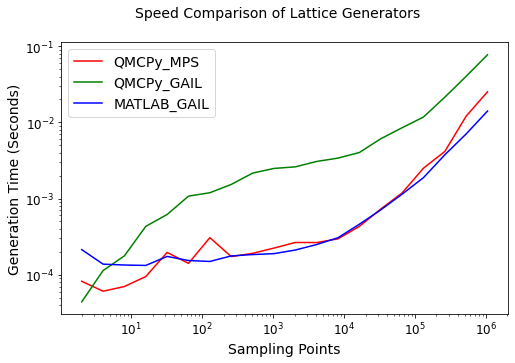

In [7]:
plt_lds_comp(df_l,'Lattice',colors=['r','g','b'])

### Sobol

In [8]:
df_s = pd.concat([df_py['n'], df_py['py_s_QRNG_n'], df_py['py_s_QRNG_gc'],  df_py['py_s_MPS_QMCPy'], \
                  df_py['py_s_PyTorch'], df_m['m_s'], df_r['r_s']], axis=1)
df_s.columns = ['N','QMCPy_QRNG_GC','QMCPy_QRNG_N','QMCPy_MPS','QMCPy_PyTorch','MATLAB','R_QRNG']
df_s.set_index('N')

,QMCPy_QRNG_GC,QMCPy_QRNG_N,QMCPy_MPS,QMCPy_PyTorch,MATLAB,R_QRNG
N,,,,,,
2.00e+00,1.49e-05,2.47e-05,2.17e-05,2.24e-01,3.13e-04,3.93e-05
4.00e+00,1.43e-05,1.66e-05,2.57e-05,1.30e-04,2.30e-04,2.29e-05
8.00e+00,1.43e-05,1.64e-05,3.47e-05,1.65e-04,2.28e-04,2.26e-05
1.60e+01,1.93e-05,5.14e-05,9.23e-05,2.86e-04,3.53e-04,3.03e-05
3.20e+01,2.96e-05,3.64e-05,1.52e-04,2.67e-04,4.88e-04,3.27e-05
6.40e+01,2.39e-05,3.66e-05,4.83e-04,3.67e-04,1.50e-03,2.31e-05
1.28e+02,4.90e-05,5.67e-05,4.62e-04,2.16e-04,4.36e-04,3.62e-05
2.56e+02,2.83e-05,4.73e-05,1.07e-03,2.40e-04,2.78e-04,2.54e-05
5.12e+02,4.40e-05,4.27e-05,1.82e-03,2.32e-04,2.29e-04,3.18e-05


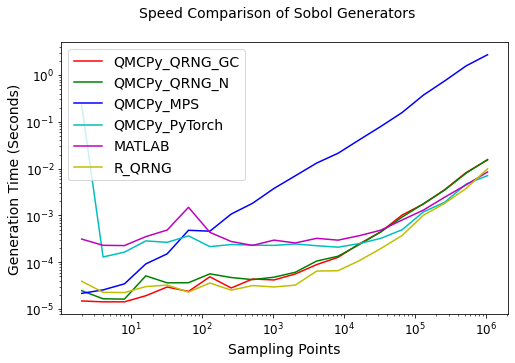

In [9]:
plt_lds_comp(df_s,'Sobol',['r','g','b','c','m','y']) # GC = GrayCode, N=Natural

### Halton (Generalized)

In [10]:
df_h = pd.concat([df_py['n'], df_py['py_h_QRNG'],df_py['py_h_Owen'], df_r['r_h'],df_m['m_h']], axis=1)
df_h.columns = ['N','QMCPy_QRNG','QMCPy_Owen','R_QRNG','MATLAB']
df_h.set_index('N')

,QMCPy_QRNG,QMCPy_Owen,R_QRNG,MATLAB
N,,,,
2.00e+00,2.74e-05,4.90e-04,1.80e-05,1.43e-04
4.00e+00,1.67e-05,5.00e-04,1.36e-05,1.05e-04
8.00e+00,1.84e-05,6.28e-04,1.49e-05,1.03e-04
1.60e+01,3.97e-05,8.48e-04,3.32e-05,1.16e-04
3.20e+01,4.93e-05,8.77e-04,2.77e-05,1.50e-04
6.40e+01,6.01e-05,1.36e-03,3.14e-05,1.14e-04
1.28e+02,7.40e-05,8.36e-04,4.30e-05,1.23e-04
2.56e+02,1.63e-04,1.26e-03,9.00e-05,1.36e-04
5.12e+02,2.38e-04,1.19e-03,1.59e-04,1.72e-04


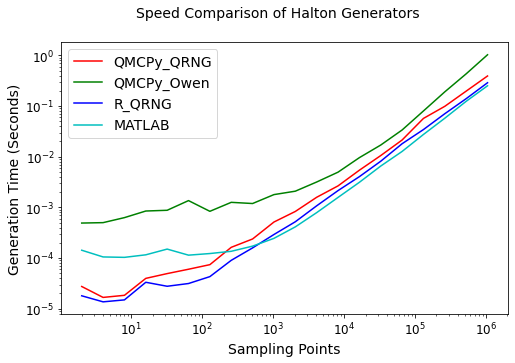

In [11]:
plt_lds_comp(df_h,'Halton',colors=['r','g','b','c'])

### Korobov

In [12]:
df_k = pd.concat([df_py['n'], df_py['py_h_QRNG'],df_r['r_k']], axis=1)
df_k.columns = ['N','QMCPy_QRNG','R_QRNG']
df_k.set_index('N')

,QMCPy_QRNG,R_QRNG
N,,
2.00e+00,2.74e-05,2.03e-05
4.00e+00,1.67e-05,2.08e-05
8.00e+00,1.84e-05,1.65e-05
1.60e+01,3.97e-05,1.99e-05
3.20e+01,4.93e-05,2.10e-05
6.40e+01,6.01e-05,2.69e-05
1.28e+02,7.40e-05,1.75e-05
2.56e+02,1.63e-04,1.79e-05
5.12e+02,2.38e-04,1.85e-05


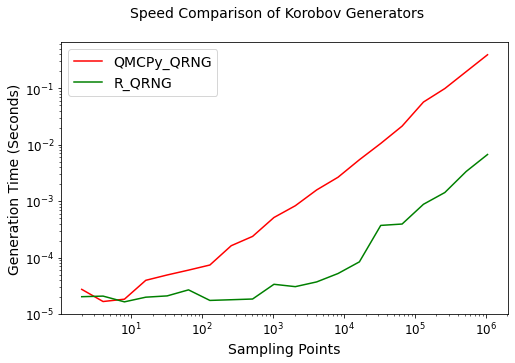

In [13]:
plt_lds_comp(df_k,'Korobov',colors=['r','g','b'])